# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 11 - Decision Tree
### Pilar García y Sonia Ruiz Pérez

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprogramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. El objetivo de hoy es:
- Ajustar el modelo a un Decision Tree
- Extraer las métricas
- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

Happy coding 🤔

In [31]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns=None

In [32]:
#Creamos el dataframe con el csv con nuestros datos.
df1 = pd.read_csv('files/taxis4_encoding.csv',index_col=0)
df1.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_no_zeros,tip_box,passengers_robust,distance_robust,fare_robust,tolls_robust,total_robust,x0_green,x0_yellow,payment_cash,payment_credit_card,pickup_borough_oe,dropoff_borough_map
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2.150000e+00,0.787753,0.0,-0.022624,-0.294118,0.0,-0.127368,0,1,0,1,2,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1.000000e-10,-10.996744,0.0,-0.389140,-0.529412,0.0,-0.511579,0,1,1,0,2,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,Alphabet City,West Village,Manhattan,Manhattan,2.360000e+00,0.886769,0.0,-0.126697,-0.235294,0.0,0.000000,0,1,0,1,2,0


In [33]:
# Vamos a quedarnos con las columnas originales, eliminamos las columnas normalizadas, estandarizas y también algunas
#  que no nos hacen falta para el modelo DecisionTree
lista_eliminar = ['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough', 'tip_no_zeros', 'tip_box', 'passengers_robust',
       'distance_robust', 'fare_robust', 'tolls_robust', 'total_robust', 'x0_green', 'payment_cash']

`Hemos eliminado las columnas x0_green y payment_cash ya que son redundantes, de x0_yellow y payment_credit_card, ya que son la inversa. Es decir si una fila x0_green toma el valor de 0 (no tiene ese atributo) en la columna x0_yellow toma el valor de 1 (si tiene ese atributo).`

In [34]:
df = df1.drop(lista_eliminar, axis=1)
df.head(3)

,passengers,distance,fare,tip,tolls,total,x0_yellow,payment_credit_card,pickup_borough_oe,dropoff_borough_map
0,1,1.60,7.0,2.15,0.0,12.95,1,1,2,0
1,1,0.79,5.0,0.00,0.0,9.30,1,0,2,0
2,1,1.37,7.5,2.36,0.0,14.16,1,1,2,0


In [35]:
# X: variables predictoras (independientes)
# y: variable respuesta (dependiente)
X = df.drop("tip", axis=1)
y = df["tip"]

In [36]:
# Dividir los datos en train y test
# random_state = 42 --> semilla, para que siempre tenga los mismos datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Crear el objeto del modelo
arbol = DecisionTreeRegressor(random_state = 0)

In [38]:
# Ajustar el modelo
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

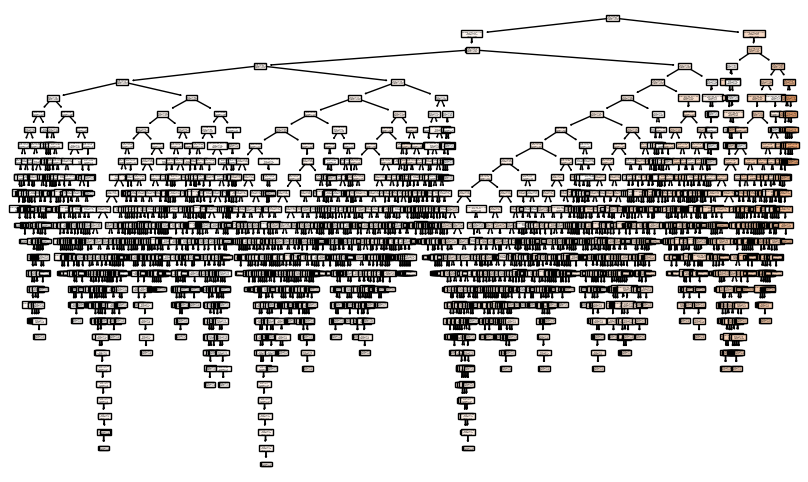

In [39]:
# Plotear el DecisionTree
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

`Como podemos observa en el gráfico, nuestro modelo tiene overfitting, ya que se ajusta perfectamente a los datos de entrenamiento.`

In [40]:
# max_features: la raíz cuadrada del número de variables predictoras
max_features = np.sqrt(len(x_train.columns))
max_features

3.0

In [41]:
# max_depth: profundidad
print(arbol.tree_.max_depth)

28


In [42]:
# Predicción para los datos de entrenamiento
y_predict_train = arbol.predict(x_train)

In [43]:
# Predicción para los datos de test
y_predict_test = arbol.predict(x_test)

In [44]:
def obtener_metricas(y_test_m, y_train_m, y_predict_test_m, y_predict_train_m, modelo):
    # En un diccionario, calcular las métricas de train y test
    resultados_metricas = {
        'MAE': [mean_absolute_error(y_test_m, y_predict_test_m), mean_absolute_error(y_train_m, y_predict_train_m)],
        'MSE': [mean_squared_error(y_test_m, y_predict_test_m), mean_squared_error(y_train_m, y_predict_train_m)],
        'RMSE': [np.sqrt(mean_squared_error(y_test_m, y_predict_test_m)), np.sqrt(mean_squared_error(y_train_m, y_predict_train_m))],
        'R2':  [r2_score(y_test_m, y_predict_test_m), r2_score(y_train_m, y_predict_train_m)],
        "set": ["test", "train"], 
        "modelo": [modelo, modelo]}

    # Pasamos a dataframe el diccionario para su mejor visualizacion
    df_resultados_metricas = pd.DataFrame(resultados_metricas)

    return df_resultados_metricas

In [45]:
df_resultado = obtener_metricas(y_test, y_train, y_predict_test, y_predict_train, "Decision Tree Regressor")
df_resultado

,MAE,MSE,RMSE,R2,set,modelo
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor


`Como vemos en la tabla de métricas obtenidas en el modelo Decision Tree tenemos un valor de R2 muy cercano a 1 y superior al R2 de test, MAE, MSE Y RMSE tienen también un valor muy inferior en train que en test, por lo que vamos a reducir la profundidad en el árbol, y así mejorar el overfitting.`

In [46]:
# Definir diccionario con los hiperparámetros a modificar
# min_samples_split: número mínimo de observaciones que debe tener un nodo para dividirse, por defecto [10, 50, 100]
# min_samples_leaf: número mínimo de observaciones que debe tener cada uno de los nodos hijos para que se produzca la division, por defecto [10, 50, 100]
param = {"max_depth": [2,5,9], "max_features": [1,2,3,4], "min_samples_split": [10, 200, 600], "min_samples_leaf": [10,200,600]}

In [47]:
# Ajustar el modelo con GridSearchCV
# cv = 10 --> número de veces que hacemos la validación
# verbose = - 1 --> para no printear ningún mensaje en la pantalla
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param, cv=10, verbose=-1,
    return_train_score=True, scoring="neg_mean_squared_error")

In [48]:
# Ajustar el modelo
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 9], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 200, 600],
                         'min_samples_split': [10, 200, 600]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [49]:
# El método nos dice cuál es el mejor modelo,
mejor_modelo = grid.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=9, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

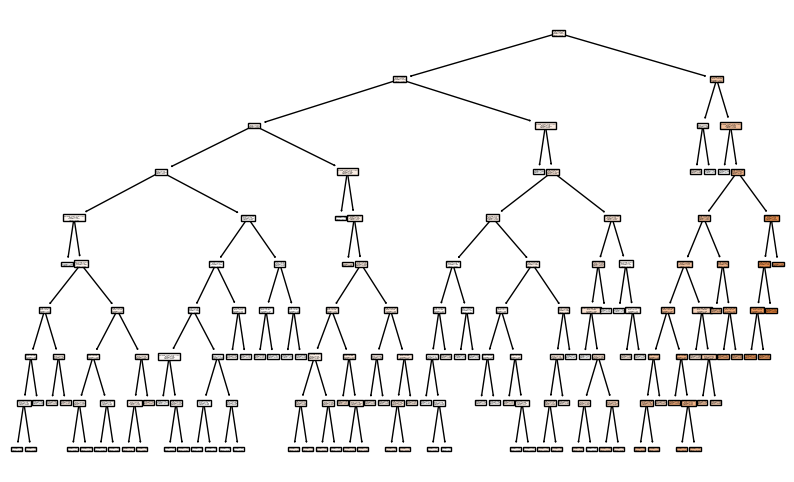

In [50]:
# Plotear el DecisionTree
fig = plt.figure(figsize = (10,6))
tree.plot_tree(mejor_modelo, feature_names = x_train.columns, filled = True)
plt.show()

In [51]:
# Predicción para los datos de entrenamiento
y_predict_train1 = arbol.predict(x_train)

In [52]:
# Predicción para los datos de test
y_predict_test1 = arbol.predict(x_test)

In [53]:
df_resultado1 = obtener_metricas(y_test, y_train, y_predict_test1, y_predict_train1, "Decision Tree Regressor 1")
df_resultado1

,MAE,MSE,RMSE,R2,set,modelo
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor 1
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 1


In [54]:
df_decision = pd.concat([df_resultado,df_resultado1], axis=0)
df_decision

,MAE,MSE,RMSE,R2,set,modelo
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor 1
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 1


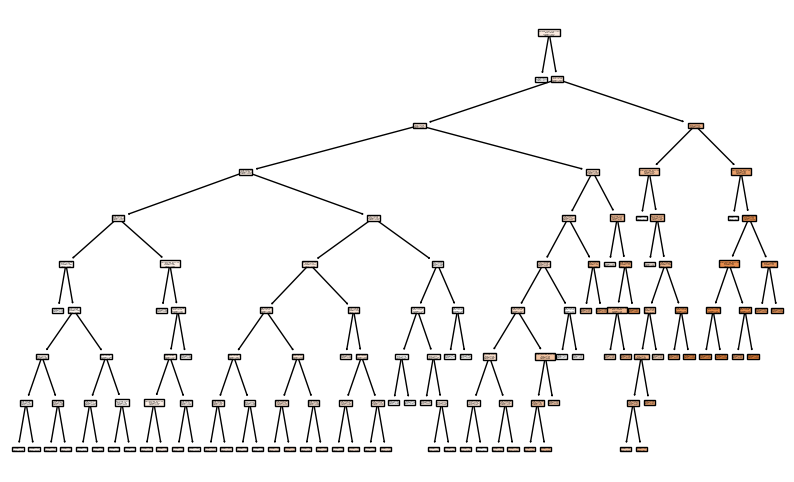

In [55]:
# Prueba 3
param2 = {"max_depth": [2,5,9], "max_features": [1,2,3,4], "min_samples_split": [10, 200, 600], "min_samples_leaf": [10,200,600]}
grid2 = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param2, cv=10, verbose=-1,
    return_train_score=True, scoring="neg_mean_squared_error")
grid2.fit(x_train, y_train)
mejor_modelo2 = grid2.best_estimator_
mejor_modelo2
fig2 = plt.figure(figsize = (10,6))
tree.plot_tree(mejor_modelo2, feature_names = x_train.columns, filled = True)
plt.show()


In [56]:
y_predict_train2 = arbol.predict(x_train)
y_predict_test2 = arbol.predict(x_test)
df_resultado2 = obtener_metricas(y_test, y_train, y_predict_test2, y_predict_train2, "Decision Tree Regressor 2")
df_resultado2

,MAE,MSE,RMSE,R2,set,modelo
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor 2
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 2


In [58]:
df_decision = pd.concat([df_decision,df_resultado2], axis=0)
df_decision

,MAE,MSE,RMSE,R2,set,modelo
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor 1
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 1
0,0.246351,0.709488,0.842311,0.865449,test,Decision Tree Regressor 2
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 2


`Al volver a hacer un nuevo modelo de Decision Tree y comprobar que sus métricas no difieren entre sí, decidimos dejarlo y probar con el Random Forest para ver que resultados obtenemos y así poder hacer valoraciones.`

In [59]:
df_decision.to_csv("files/resultados_taxis_decisiontree.csv")